In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
warnings.filterwarnings('ignore')

train_df = pd.read_csv('./datasets/titanic/train.csv')
test_df = pd.read_csv('./datasets/titanic/test.csv')
test_y_df = pd.read_csv('./datasets/titanic/gender_submission.csv')

In [3]:
train = train_df[['Pclass', 'Sex', 'Age', 'Survived']]
test = test_df[['Pclass', 'Sex', 'Age']]
test_y = test_y_df['Survived']

In [4]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [5]:
train = train.dropna(axis=0)

In [6]:
# 'Sex' Labelencoding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])

train['Sex'] = data

In [7]:
# 'Age' Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(train[['Age']])

train['Age'] = data

In [8]:
X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()

lr.fit(X, y)

LogisticRegression()

In [9]:
# test data 전처리
test = test.fillna(np.mean(test['Age']))

# 'Sex' Labelencoding
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])

test['Sex'] = data

# 'Age' Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(test[['Age']])

test['Age'] = data

In [12]:
train

,Pclass,Sex,Age,Survived
0,3,1,0.271174,0
1,1,0,0.472229,1
2,3,0,0.321438,1
3,1,0,0.434531,1
4,3,1,0.434531,0
...,...,...,...,...
885,3,0,0.484795,0
886,2,1,0.334004,0
887,1,0,0.233476,1
889,1,1,0.321438,1


In [13]:
test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [11]:
pred = lr.predict(test)

### accuracy_score, recall_score, precision_score, F1 score
#### sklearn.metrics.accuracy_score
> sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

#### sklearn.metrics.recall_score
> sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.precision_score
> sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.f1_score
> sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.confusion_matrix
> sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

#### sklearn.metrics.precision_recall_curve
> sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [19]:
def get_eval(y_test, pred):
	accuracy = accuracy_score(y_test, pred)
	recall = recall_score(y_test, pred)
	precision = precision_score(y_test, pred)
	f1score = f1_score(y_test, pred)
	matrix = confusion_matrix(y_test, pred)

	print(f'혼동 행렬 : {matrix}')
	print(f'정확도 : {accuracy}\n재현율 : {recall}\n정밀도 : {precision}\nf1_score : {f1score}')

In [20]:
get_eval(test_y, pred)

혼동 행렬 : [[252  14]
 [ 10 142]]
정확도 : 0.9425837320574163
재현율 : 0.9342105263157895
정밀도 : 0.9102564102564102
f1_score : 0.922077922077922


In [22]:
pred_proba = lr.predict_proba(test)

In [23]:
pred = lr.predict(test)

In [25]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [26]:
pred[:5]

array([0, 0, 0, 0, 1])

#### sklearn.metrics.precision_recall_curve
> sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [28]:
pred_proba[:, 1]

array([0.07859469, 0.40012021, 0.11240735, 0.09531844, 0.57423633,
       0.13190527, 0.5184511 , 0.258755  , 0.60152323, 0.11092072,
       0.08766123, 0.39031199, 0.93153317, 0.10962781, 0.87374957,
       0.80417134, 0.21316818, 0.11092072, 0.53950063, 0.41371357,
       0.33192653, 0.14888252, 0.91725721, 0.56417407, 0.87060983,
       0.05224505, 0.93330781, 0.10682239, 0.42429246, 0.08766123,
       0.15079163, 0.26970498, 0.49733588, 0.51653409, 0.50115909,
       0.11805713, 0.51653409, 0.5811075 , 0.10028788, 0.08766123,
       0.06989277, 0.49923973, 0.06631845, 0.77618711, 0.87983367,
       0.10028788, 0.39703466, 0.08766123, 0.82755304, 0.47623016,
       0.54329763, 0.25338977, 0.82130757, 0.92198718, 0.23635171,
       0.14534875, 0.0775809 , 0.10028788, 0.08766123, 0.90416115,
       0.12252737, 0.22768339, 0.1195313 , 0.57423633, 0.61855952,
       0.77485055, 0.60152323, 0.38363073, 0.49411816, 0.82755304,
       0.56041019, 0.11092072, 0.52547861, 0.51171876, 0.90657

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y, pred_proba[:, 1])

In [33]:
precisions

array([0.36363636, 0.36450839, 0.36538462, 0.36626506, 0.36714976,
       0.36803874, 0.36982968, 0.37163814, 0.37254902, 0.37346437,
       0.37530864, 0.37623762, 0.37717122, 0.37905237, 0.38      ,
       0.38383838, 0.3857868 , 0.44186047, 0.4457478 , 0.44970414,
       0.45645646, 0.45783133, 0.46341463, 0.47204969, 0.48253968,
       0.48717949, 0.48874598, 0.49511401, 0.49673203, 0.51351351,
       0.51525424, 0.52054795, 0.52233677, 0.52413793, 0.53146853,
       0.53710247, 0.53900709, 0.54092527, 0.54285714, 0.54676259,
       0.54873646, 0.55072464, 0.55272727, 0.55474453, 0.55677656,
       0.55882353, 0.56296296, 0.56505576, 0.56716418, 0.56928839,
       0.57142857, 0.57358491, 0.57575758, 0.58015267, 0.58237548,
       0.58687259, 0.59375   , 0.59607843, 0.5984252 , 0.60079051,
       0.6031746 , 0.608     , 0.61788618, 0.63070539, 0.63598326,
       0.64135021, 0.64680851, 0.65800866, 0.66086957, 0.66960352,
       0.67857143, 0.68468468, 0.68778281, 0.69406393, 0.70370

In [31]:
import matplotlib.pyplot as plt

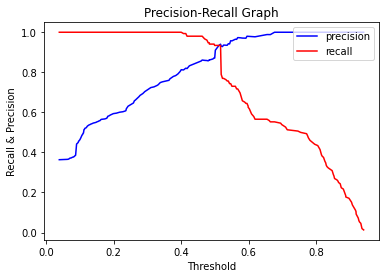

In [38]:
plt.title("Precision-Recall Graph")
plt.xlabel("Threshold"   )
plt.ylabel("Recall & Precision")
plt.plot(thresholds, precisions[:194], "b", label = "precision")
plt.plot(thresholds, recalls[:194], "r", label = "recall")
plt.legend(loc = "upper right")
plt.show()